<img SRC="img1.jpg"/>
<center><h1 Style="color:#7FFF00">Análisis de Datos</h1></center>
<center><h3>Universidad Castro Carazo</h3></center>
<center><h6>II Cuatrimestre, 2022</h6></center>
</br>
<p Style=”text-aling: justify”> En el siguiente notebook se present un análisis de los datos sobre vehículos que se encuentran en el stock de ventas por parte de la empresa: Pichirilos Co. 

El próposito del mismo es el intentar responder a la interrogante del negocio en particular: Cómo se podría incrementar el nivel de ventas.</p>

</br>
</br>
<a href="https://archive.ics.uci.edu/ml/datasets/Automobile">Fuente de datos para el análisis</a>

#Mete texto solo

En el siguiente notebook se present un análisis de los datos sobre vehículos que se encuentran en el stock de ventas por parte de la empresa: Pichirilos Co. 

El próposito del mismo es el intentar responder a la interrogante del negocio en particular: Cómo se podría incrementar el nivel de ventas.


<h2 Style="color: #DC143C"> 1. Carga y estandarización de los sets de datos</h2>

<p>Qué se hace en esta etapa?</p>

<ol>
    <li>Importar librerías</li>
    <li>Importar los sets de datos</li>
    <li>Revisar encabezados de los DataFrames</li>
    <li>Si hay más de un set de datos - unirlos en un solo DF</li>
</ol>
    
<h3 Style="color: #008B8B"> 1.1 Importar librerías</h3>

In [2]:
import pandas as pd              #Se usa para manejo de DataFrames
import numpy as np               #Maneja estructuras de datos: listas, tuplas, diccionarios, arrays.
import matplotlib.pyplot as ptl  #gráficos

<h3 Style="color: #008B8B"> 1.2. Importar set de datos</h3>

In [3]:
cols = ["symboling", "normalized", "make", "fuel", "aspiration", "doors",
"style", "wheels", "engine", "base", "length", "width", "heingt",
"curb", "engineType", "Cylinders", "engine-size", "system", "bore", "stroke",
"compression", "horsepower", "peak", "City", "Higway", "price"]

df_1er_autos = pd.read_csv("autos.csv", names=cols)
df_2do_autos = pd.read_csv("autos1.csv", names=cols)

In [4]:
df_1er_autos.shape #Muestra el tamaño del DF
                    #Se separa por líneas para conocer el tamaño de cada DF


(197, 26)

In [5]:
df_2do_autos.shape #Muestra el tamaño del DF

(29, 26)

In [6]:
df_1er_autos.head(10) #Muestra los primeros 10 registros


,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [7]:
df_1er_autos.tail(10) #Muestra los últimos 10 registros

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
187,2,94,volkswagen,diesel,turbo,four,sedan,fwd,front,97.3,...,97,idi,3.01,3.40,23.0,68,4500,37,42,9495
188,2,94,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,10.0,100,5500,26,32,9995
189,3,?,volkswagen,gas,std,two,convertible,fwd,front,94.5,...,109,mpfi,3.19,3.40,8.5,90,5500,24,29,11595
190,3,256,volkswagen,gas,std,two,hatchback,fwd,front,94.5,...,109,mpfi,3.19,3.40,8.5,90,5500,24,29,9980
191,0,?,volkswagen,gas,std,four,sedan,fwd,front,100.4,...,136,mpfi,3.19,3.40,8.5,110,5500,19,24,13295
192,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845
193,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290
194,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
196,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985


In [8]:
df_1er_autos.describe() #Muestra datos estadísticos descriptivos generales

,symboling,base,length,width,heingt,curb,engine-size,compression,City,Higway
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,0.913706,98.409645,173.450254,65.812690,53.628934,2534.796954,126.263959,10.128020,25.416244,30.984772
std,1.202746,5.866965,12.213912,2.128306,2.438891,520.401159,42.282594,3.934467,6.566717,6.908644
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.000000,52.000000,2140.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,96.500000,172.600000,65.400000,53.900000,2405.000000,110.000000,9.000000,25.000000,30.000000
75%,2.000000,100.400000,178.500000,66.500000,55.500000,2844.000000,141.000000,9.400000,30.000000,36.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


<h3 Style="color: #008B8B"> 1.3. Revisar encabezados de los Dataframes</h3>


In [9]:
df_1er_autos.info() #Muestra datos tipo objeto o caracter (no numérico)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symboling    197 non-null    int64  
 1   normalized   197 non-null    object 
 2   make         197 non-null    object 
 3   fuel         197 non-null    object 
 4   aspiration   197 non-null    object 
 5   doors        197 non-null    object 
 6   style        197 non-null    object 
 7   wheels       197 non-null    object 
 8   engine       197 non-null    object 
 9   base         197 non-null    float64
 10  length       197 non-null    float64
 11  width        197 non-null    float64
 12  heingt       197 non-null    float64
 13  curb         197 non-null    int64  
 14  engineType   197 non-null    object 
 15  Cylinders    197 non-null    object 
 16  engine-size  197 non-null    int64  
 17  system       197 non-null    object 
 18  bore         197 non-null    object 
 19  stroke  

In [10]:
df_1er_autos.columns

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'Cylinders', 'engine-size', 'system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'City', 'Higway',
       'price'],
      dtype='object')

In [11]:
df_2do_autos.columns

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'Cylinders', 'engine-size', 'system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'City', 'Higway',
       'price'],
      dtype='object')

<h3 Style="color: #008B8B"> 1.4. Unir archivos en un solo Dataframe</h3>

In [12]:
unionArchivos = [df_1er_autos, df_2do_autos] #Lista de DataFrames

dfAutos = pd.concat(unionArchivos) #Une los archivos en una nueva variable: dfAutos

dfAutos.shape # dimensionamiento con cantidad de datos y de columnas

(226, 26)

In [13]:
# iloc (fila, columna) fila= 0:2, agarra una fila, agarra las primeras antes del numero, en este caso 1.
# iloc (:, 0:2) # first two columns of data frame with all rows
# iloc[[0,3,6,24], [0,5,6]] # 1st, 4th, 7th, 25th row + 1st 6th 7th columns.

dfAutos.iloc[[0,3,6,24], [0,5,6]] # 1st, 4th, 7th, 25th row + 1st 6th 7th columns.



,symboling,doors,style
0,3,two,convertible
3,2,four,sedan
6,1,four,sedan
24,1,four,hatchback


In [14]:
# Nota: Cuando se trabaja con un DF grande, se puede usar uno de back up
df_Autos = dfAutos #df_Autos es el back up


<h2 Style="color: #DC143C"> 2. Manejo de valores faltantes o perdidos</h2>

<p>Qué se hace en esta etapa?</p>

<ol>
    <li>Identificar cómo se muestran los valores faltantes (null/espacio en blanco o vacío/?) y estandarizarlos (NaN - Not a Number)</li>
    <li>Anális de imputación para datos numéricos(promedio, para que no genere Desv Stan)</li>
    <li>Anális de imputación para datos caracter(valor más frecuente / ML)</li>
    <li>Eliminan filas o columnas con valores faltantes </li>
</ol>
    
<h3 Style="color: #008B8B"> 2.1 Identificar cómo se muestran los valores faltantes (null / espacio en blanco o vacío / ?) y estandarizarlos (NaN - Not a Number)
Paso 1.</h3>

In [15]:
df_Autos.head(15)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [16]:
df_Autos.tail(10)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
19,2,94,volkswagen,diesel,turbo,four,sedan,fwd,front,97.3,...,97,idi,3.01,3.4,23.0,68,4500,37,42,9495
20,2,94,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.4,10.0,100,5500,26,32,9995
21,3,?,volkswagen,gas,std,two,convertible,fwd,front,94.5,...,109,mpfi,3.19,3.4,8.5,90,5500,24,29,11595
22,3,256,volkswagen,gas,std,two,hatchback,fwd,front,94.5,...,109,mpfi,3.19,3.4,8.5,90,5500,24,29,9980
23,0,?,volkswagen,gas,std,four,sedan,fwd,front,100.4,...,136,mpfi,3.19,3.4,8.5,110,5500,19,24,13295
24,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.4,23.0,68,4500,33,38,13845
25,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.4,9.0,88,5500,25,31,12290
26,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
27,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
28,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985


In [17]:
df_Autos.replace("?", np.nan, inplace = True) #reemplaza caracteres, el reemplazo queda en firme con inplace = True
df_Autos.head(10)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


<h3 Style="color: #008B8B"> 2.1 Paso 2 = Contar valores faltantes por columna</h3>

In [18]:
valoresPerdidos = df_Autos.isnull()

In [19]:
valoresPerdidos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
for column in valoresPerdidos.columns.values.tolist():
    print(column)
    print(valoresPerdidos[column].value_counts())
    print ("")

symboling
False    226
Name: symboling, dtype: int64

normalized
False    180
True      46
Name: normalized, dtype: int64

make
False    226
Name: make, dtype: int64

fuel
False    226
Name: fuel, dtype: int64

aspiration
False    226
Name: aspiration, dtype: int64

doors
False    224
True       2
Name: doors, dtype: int64

style
False    226
Name: style, dtype: int64

wheels
False    226
Name: wheels, dtype: int64

engine
False    226
Name: engine, dtype: int64

base
False    226
Name: base, dtype: int64

length
False    226
Name: length, dtype: int64

width
False    226
Name: width, dtype: int64

heingt
False    226
Name: heingt, dtype: int64

curb
False    226
Name: curb, dtype: int64

engineType
False    226
Name: engineType, dtype: int64

Cylinders
False    226
Name: Cylinders, dtype: int64

engine-size
False    226
Name: engine-size, dtype: int64

system
False    226
Name: system, dtype: int64

bore
False    222
True       4
Name: bore, dtype: int64

stroke
False    222
True     

<h3 Style="color: #008B8B"> 2.2 Anális de imputación para datos numéricos</h3>

In [21]:
avg_normalized = df_Autos["normalized"].astype("float").mean(axis=0) #axis 0 columna axis 1 fila

print ('La media de la columna normalized es: ', avg_normalized )

La media de la columna normalized es:  122.28333333333333


In [22]:
df_Autos["normalized"].replace(np.nan, 122, inplace=True)

In [23]:
df_Autos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [24]:
avg_normalized = df_Autos["bore"].astype("float").mean(axis=0) #axis 0 columna axis 1 fila

print ('La media de la columna normalized es: ', avg_normalized )

La media de la columna normalized es:  3.319459459459461


In [25]:
df_Autos["bore"].replace(np.nan, 3, inplace=True)

In [26]:
df_Autos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [27]:
avg_normalized = df_Autos["stroke"].astype("float").mean(axis=0) #axis 0 columna axis 1 fila

print ('La media de la stroke es: ', avg_normalized )

La media de la stroke es:  3.2785135135135075


In [28]:
df_Autos["stroke"].replace(np.nan, 3, inplace=True)

In [29]:
df_Autos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [30]:
avg_normalized = df_Autos["horsepower"].astype("float").mean(axis=0) #axis 0 columna axis 1 fila

print ('La media de la horsepower es: ', avg_normalized )

La media de la horsepower es:  102.98214285714286


In [31]:
df_Autos["horsepower"].replace(np.nan, 103, inplace=True)

In [32]:
df_Autos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [33]:
avg_normalized = df_Autos["peak"].astype("float").mean(axis=0) #axis 0 columna axis 1 fila

print ('La media de la peak es: ', avg_normalized )

La media de la peak es:  5100.892857142857


In [34]:
df_Autos["peak"].replace(np.nan, 5100, inplace=True)

In [35]:
df_Autos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [36]:
avg_normalized = df_Autos["price"].astype("float").mean(axis=0) #axis 0 columna axis 1 fila

print ('La media de la price es: ', avg_normalized )

La media de la price es:  12780.941441441442


In [37]:
df_Autos["price"].replace(np.nan, 12781, inplace=True)

In [38]:
df_Autos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


<h3 Style="color: #008B8B"> 2.4 Imputar datos tipo caracter</h3>

In [39]:
df_Autos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [40]:
df_Autos['doors'].value_counts() #value_counts() cuenta los valores

four    124
two     100
Name: doors, dtype: int64

In [41]:
df_Autos["doors"].value_counts().idxmax() #Idxmax es el valor con mas conteos

'four'

In [42]:
df_Autos["doors"].replace(np.nan, 'four', inplace=True) #replace(dato a reemplazar, nuevo dato, comando true)

In [43]:
valoresPerdidos = df_Autos.isnull() #isnull (buscar nulos)

for column in valoresPerdidos.columns.values.tolist():
    print(column)
    print(valoresPerdidos[column].value_counts())
    print ("")

symboling
False    226
Name: symboling, dtype: int64

normalized
False    226
Name: normalized, dtype: int64

make
False    226
Name: make, dtype: int64

fuel
False    226
Name: fuel, dtype: int64

aspiration
False    226
Name: aspiration, dtype: int64

doors
False    226
Name: doors, dtype: int64

style
False    226
Name: style, dtype: int64

wheels
False    226
Name: wheels, dtype: int64

engine
False    226
Name: engine, dtype: int64

base
False    226
Name: base, dtype: int64

length
False    226
Name: length, dtype: int64

width
False    226
Name: width, dtype: int64

heingt
False    226
Name: heingt, dtype: int64

curb
False    226
Name: curb, dtype: int64

engineType
False    226
Name: engineType, dtype: int64

Cylinders
False    226
Name: Cylinders, dtype: int64

engine-size
False    226
Name: engine-size, dtype: int64

system
False    226
Name: system, dtype: int64

bore
False    226
Name: bore, dtype: int64

stroke
False    226
Name: stroke, dtype: int64

compression
False   

<h3 Style="color: #008B8B"> 2.5 Eliminar filas con valores faltantes</h3>

In [44]:
df_Autos.dropna(subset = ['price'], axis= 0, inplace=True) #dropna - elimina campos vacios

df_Autos.reset_index(drop=True, inplace=True) #como borramos filas hay que reiniciar el indice porque queda un hueco, de las filas que me vole


In [45]:
df_Autos

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,0,122,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.4,23.0,68,4500,33,38,13845
222,0,122,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.4,9.0,88,5500,25,31,12290
223,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
224,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415


In [46]:
valoresPerdidos = df_Autos.isnull() #isnull (buscar nulos)

for column in valoresPerdidos.columns.values.tolist():
    print(column)
    print(valoresPerdidos[column].value_counts())
    print ("")

symboling
False    226
Name: symboling, dtype: int64

normalized
False    226
Name: normalized, dtype: int64

make
False    226
Name: make, dtype: int64

fuel
False    226
Name: fuel, dtype: int64

aspiration
False    226
Name: aspiration, dtype: int64

doors
False    226
Name: doors, dtype: int64

style
False    226
Name: style, dtype: int64

wheels
False    226
Name: wheels, dtype: int64

engine
False    226
Name: engine, dtype: int64

base
False    226
Name: base, dtype: int64

length
False    226
Name: length, dtype: int64

width
False    226
Name: width, dtype: int64

heingt
False    226
Name: heingt, dtype: int64

curb
False    226
Name: curb, dtype: int64

engineType
False    226
Name: engineType, dtype: int64

Cylinders
False    226
Name: Cylinders, dtype: int64

engine-size
False    226
Name: engine-size, dtype: int64

system
False    226
Name: system, dtype: int64

bore
False    226
Name: bore, dtype: int64

stroke
False    226
Name: stroke, dtype: int64

compression
False   

<h2 Style="color: #DC143C"> 3. Estandarización de datos</h2>

<p>Qué se hace en esta etapa?</p>

<ol>
    <li>Verificar el dominio de las variables y se ajusta de ser necesario</li>
    <li>Convertir valores en función de la interpretación</li>
    <li>Normalizar los datos para que sus valores queden entre 0 y 1</li>
    <li>Agrupar datos (Binning)</li>
</ol>
    
<h3 Style="color: #008B8B"> 3.1 Verificar el dominio de las variables</h3>

In [47]:
df_Autos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [48]:
df_Autos.dtypes #tipos de valores

symboling        int64
normalized      object
make            object
fuel            object
aspiration      object
doors           object
style           object
wheels          object
engine          object
base           float64
length         float64
width          float64
heingt         float64
curb             int64
engineType      object
Cylinders       object
engine-size      int64
system          object
bore            object
stroke          object
compression    float64
horsepower      object
peak            object
City             int64
Higway           int64
price           object
dtype: object

In [49]:
df_Autos[["normalized","peak"]] = df_Autos[["normalized","peak"]].astype("int") #cambia tipo de dato doble[[]]porque eran 2 datos
df_Autos[["bore","stroke","price"]] = df_Autos[["bore","stroke","price"]].astype("float")

In [50]:
df_Autos.dtypes

symboling        int64
normalized       int32
make            object
fuel            object
aspiration      object
doors           object
style           object
wheels          object
engine          object
base           float64
length         float64
width          float64
heingt         float64
curb             int64
engineType      object
Cylinders       object
engine-size      int64
system          object
bore           float64
stroke         float64
compression    float64
horsepower      object
peak             int32
City             int64
Higway           int64
price          float64
dtype: object

<h3 Style="color: #008B8B"> 3.2 Convertir valores en función de su interpretación</h3>

In [51]:
df_Autos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [52]:
df_Autos["city-L/100"]= 235/df_Autos["City"] #Añade una nueva columna con los datos convertidos a litros por km.
df_Autos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,system,bore,stroke,compression,horsepower,peak,City,Higway,price,city-L/100
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,13.055556


In [53]:
df_Autos["Higway-L/100km"] = 235/df_Autos["Higway"]
df_Autos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,bore,stroke,compression,horsepower,peak,City,Higway,price,city-L/100,Higway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,13.055556,10.681818


<h3 Style="color: #008B8B">3.3 Normalizacion de Datos</h3>

In [54]:
df_Autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   symboling       226 non-null    int64  
 1   normalized      226 non-null    int32  
 2   make            226 non-null    object 
 3   fuel            226 non-null    object 
 4   aspiration      226 non-null    object 
 5   doors           226 non-null    object 
 6   style           226 non-null    object 
 7   wheels          226 non-null    object 
 8   engine          226 non-null    object 
 9   base            226 non-null    float64
 10  length          226 non-null    float64
 11  width           226 non-null    float64
 12  heingt          226 non-null    float64
 13  curb            226 non-null    int64  
 14  engineType      226 non-null    object 
 15  Cylinders       226 non-null    object 
 16  engine-size     226 non-null    int64  
 17  system          226 non-null    obj

In [55]:
dfTemp = df_Autos[['length', 'width', 'heingt']]
dfTemp.head(5)

,length,width,heingt
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3


In [56]:
df_Autos['length'] = df_Autos['length']/df_Autos['length'].max()
df_Autos['width'] = df_Autos['width']/df_Autos['width'].max()
df_Autos['heingt'] = df_Autos['heingt']/df_Autos['heingt'].max()

In [57]:
dfTemp = df_Autos[['length', 'width', 'heingt']]
dfTemp.head(5)

,length,width,heingt
0,0.811148,0.886584,0.816054
1,0.811148,0.886584,0.816054
2,0.822681,0.905947,0.876254
3,0.848630,0.915629,0.908027
4,0.848630,0.918396,0.908027


<h3 Style="color: #008B8B">3.4 Binning</h3>

In [58]:
df_Autos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,bore,stroke,compression,horsepower,peak,City,Higway,price,city-L/100,Higway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,13.055556,10.681818


In [59]:
df_Autos[['horsepower']] = df_Autos[["horsepower"]].astype("int")
df_Autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   symboling       226 non-null    int64  
 1   normalized      226 non-null    int32  
 2   make            226 non-null    object 
 3   fuel            226 non-null    object 
 4   aspiration      226 non-null    object 
 5   doors           226 non-null    object 
 6   style           226 non-null    object 
 7   wheels          226 non-null    object 
 8   engine          226 non-null    object 
 9   base            226 non-null    float64
 10  length          226 non-null    float64
 11  width           226 non-null    float64
 12  heingt          226 non-null    float64
 13  curb            226 non-null    int64  
 14  engineType      226 non-null    object 
 15  Cylinders       226 non-null    object 
 16  engine-size     226 non-null    int64  
 17  system          226 non-null    obj

In [60]:
cat = np.linspace(min(df_Autos['horsepower']), max(df_Autos["horsepower"]), 4)
cat

array([ 48., 128., 208., 288.])

In [61]:
nombres = ["bajo", "medio", "alto"]
df_Autos["horsepower-bins"] = pd.cut(df_Autos['horsepower'], bins = cat, labels = nombres, include_lowest=True)
df_Autos[["horsepower", "horsepower-bins"]].head(5)

,horsepower,horsepower-bins
0,111,bajo
1,111,bajo
2,154,medio
3,102,bajo
4,115,bajo


In [62]:
df_Autos["horsepower-bins"].value_counts()

bajo     184
medio     40
alto       2
Name: horsepower-bins, dtype: int64

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt

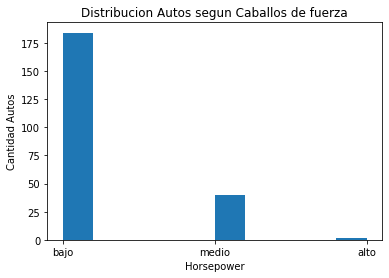

In [64]:
plt.hist(df_Autos["horsepower-bins"])
plt.xlabel("Horsepower")
plt.ylabel("Cantidad Autos")
plt.title("Distribucion Autos segun Caballos de fuerza")
plt.show()

In [65]:
df_Autos.head(10)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,stroke,compression,horsepower,peak,City,Higway,price,city-L/100,Higway-L/100km,horsepower-bins
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495.0,11.190476,8.703704,bajo
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500.0,11.190476,8.703704,bajo
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500.0,12.368421,9.038462,medio
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950.0,9.791667,7.833333,bajo
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450.0,13.055556,10.681818,bajo
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,3.40,8.5,110,5500,19,25,15250.0,12.368421,9.400000,bajo
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,3.40,8.5,110,5500,19,25,17710.0,12.368421,9.400000,bajo
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,...,3.40,8.5,110,5500,19,25,18920.0,12.368421,9.400000,bajo
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,3.40,8.3,140,5500,17,20,23875.0,13.823529,11.750000,medio
9,0,122,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,3.40,7.0,160,5500,16,22,12781.0,14.687500,10.681818,medio


<h2 Style="color:#DC143C">4. Visualizacion de datos</h2>

<p>Que se hace en esta etapa?</p>

<ol>
    <li>Responder las preguntas de Negocio</li>
    <li>Liberar Conocimiento</li>
    <li>Gerenerar Informe al Negocio</li>
</ol>

In [66]:
gf1 = df_Autos.groupby(['horsepower-bins']).count()
gf1 = gf1.iloc[:,:1]
gf1

,symboling
horsepower-bins,
bajo,184
medio,40
alto,2


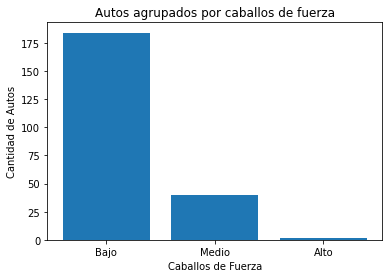

<Figure size 1080x2160 with 0 Axes>

In [67]:
eje_x = ("Bajo", "Medio", "Alto")
eje_y = gf1['symboling'].tolist()

##Creamos la Grafica
plt.bar(eje_x, eje_y)

##Leyenda en el eje y
plt.ylabel('Cantidad de Autos')

##Leyenda en el eje x
plt.xlabel("Caballos de Fuerza")

##Titulo del Grafico
plt.title("Autos agrupados por caballos de fuerza")

##Tamano del grafico
plt.figure(figsize=(15,30))
plt.show()

In [68]:
gf2 = df_Autos.groupby(['make']).count()
gf2 = gf2.iloc[:,:1]
gf2
#gf2 = gf2.sort_values('symboling') #Ordena de menor a mayor

,symboling
make,
alfa-romero,3
audi,7
bmw,8
chevrolet,3
dodge,9
honda,13
isuzu,4
jaguar,3
mazda,17


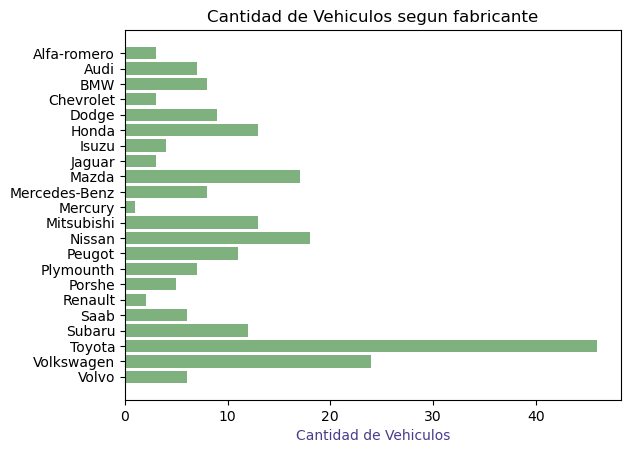

In [71]:

eje_x = ("Alfa-romero", "Audi", "BMW","Chevrolet", "Dodge", "Honda", "Isuzu", "Jaguar", "Mazda", "Mercedes-Benz", "Mercury",
        "Mitsubishi", "Nissan", "Peugot", "Plymounth", "Porshe", "Renault", "Saab", "Subaru", "Toyota", "Volkswagen", "Volvo")
eje_y = gf2['symboling'].tolist() #grafico vertical es para cuando hay mas datos

plt.rcdefaults()
fig, ax = plt.subplots()


#Este se alimente de la lista eje_x

y_pos = np.arange(len(eje_x))

ax.barh(y_pos, eje_y, height=0.8, align='center', color='#006400', alpha=0.5) #alpha da transparencia a las barras

##Preguntar al profe (y_pos, eje_y, align='center', color= "#006400", alpha=0.5 )

ax.set_yticks(y_pos, labels=eje_x, color= 'black')
ax.invert_yaxis() #labels read top to bottom
ax.set_xlabel('Cantidad de Vehiculos').set_color('#483D8B')
ax.set_title('Cantidad de Vehiculos segun fabricante')

plt.show()

In [ ]:
#Grafico circular

df_Autos.head(2)

In [72]:
gf3 = df_Autos.groupby(['doors']).count()
gf3 = gf3.iloc[:,:1]
gf3

,symboling
doors,
four,126
two,100


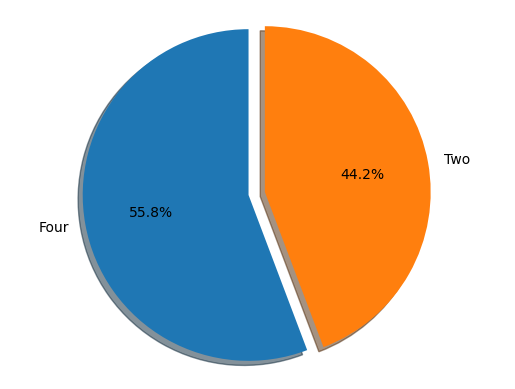

In [73]:

etiquetas = "Four", "Two"
sizes = gf3["symboling"].tolist()

separacion = (0, 0.1) #ocupa la cantidad de elementos en los graficos

fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=separacion, labels=etiquetas, autopct='%1.1f%%', shadow=True, startangle=90) #autopct pone porcentajes
ax1.axis('equal')

plt.show()


In [90]:
gf4 = df_Autos.groupby(['style']).count()
gf4 = gf4.iloc[:,:1]
gf4


,symboling
style,
convertible,8
hardtop,10
hatchback,77
sedan,105
wagon,26


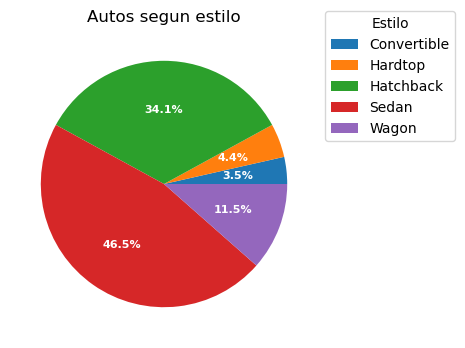

In [91]:
fig, ax = plt.subplots(figsize=(8,4), subplot_kw=dict(aspect="equal"))
data = gf4['symboling'].tolist()
estilo = ['Convertible', 'Hardtop', 'Hatchback', 'Sedan', 'Wagon']

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, estilo,
          title="Estilo",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1.7))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Autos segun estilo")

plt.show()

In [92]:
import matplotlib.pyplot as plt
import numpy as np

In [93]:
gf5 = df_Autos.groupby(['style']).count()
gf5 = gf5.iloc[:,:1]
gf5

,symboling
style,
convertible,8
hardtop,10
hatchback,77
sedan,105
wagon,26


AttributeError: 'list' object has no attribute 'sum'

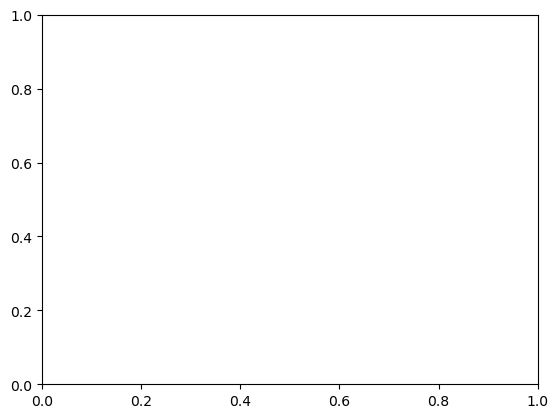

In [96]:
##preguntar al profe

fig, ax = plt.subplots()

size = 0.3

vals = data

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)


ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))


ax.set(aspect="equal", title='Autos segun estilo')
plt.show()

##Preguntar al profe

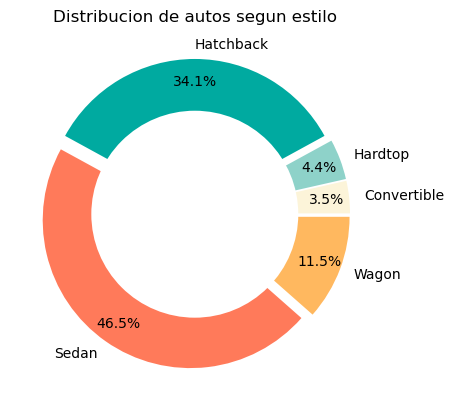

In [85]:
# Colores
colors = ['#FCF4D9', '#8ED2C9', '#00AAA0', 
          '#FF7A5A', '#FFB85F']
 
# Separaciones
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

# Creacion de grafica circular
plt.pie(data, colors=colors, labels=estilo,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

# dibujo de circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Esta linea agrega el cirulo blanco sobre la grafica
fig.gca().add_artist(centre_circle)

plt.title('Distribucion de autos segun estilo')

# Displaing Chart
plt.show()

In [86]:
#Grafica de dispercion

df_Autos[['price', 'horsepower']].head(10)


,price,horsepower
0,13495.0,111
1,16500.0,111
2,16500.0,154
3,13950.0,102
4,17450.0,115
5,15250.0,110
6,17710.0,110
7,18920.0,110
8,23875.0,140
9,12781.0,160


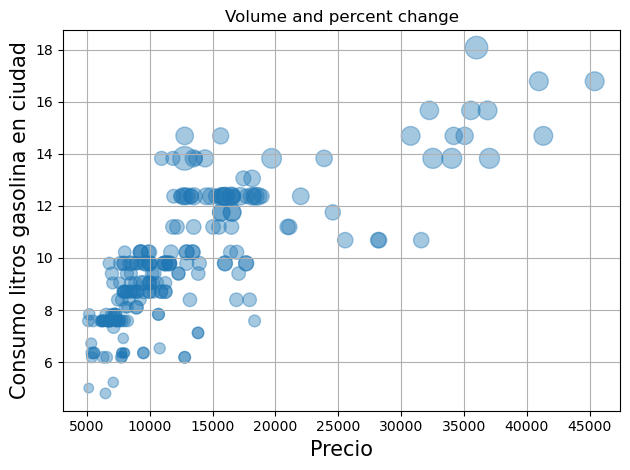

In [83]:
fig, ax = plt.subplots()

ax.scatter(df_Autos['price'],df_Autos['city-L/100'],s=df_Autos['horsepower'], alpha=0.4)

ax.set_xlabel("Precio", fontsize=15)

#grafico en 3d x, y, z: price es x, horsepower es y alpha es transparencia

ax.set_ylabel("Consumo litros gasolina en ciudad", fontsize=15)

ax.set_title('Volume and percent change')

ax.grid(True)

fig.tight_layout()

plt.show()                                

In [ ]:
#Buscar sobre story telling y jurisprudencia
